In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Analysis/GDP%20vs%20Life%20Expectancy/all_data.csv')
countries = df.Country.unique().tolist()

# Summary statistics

C:\Users\Tahlon\AppData\Local\Temp\ipykernel_35836\2107372698.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['filler' ,'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'])


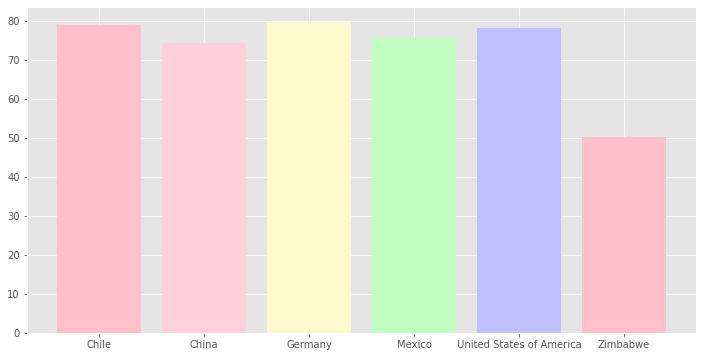

<Figure size 432x288 with 0 Axes>

In [60]:
mean_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].mean()
min_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].min()
max_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].max()
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
ax = plt.subplot()
plt.bar(range(len(countries)), mean_life_expectancy, color=['#FFC0CB', '#FFD1DC', '#FFFACD', '#C0FFC0', '#C0C0FF'])
ax.set_xticklabels(['filler' ,'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']) 
plt.show()
plt.clf()

This graph shows the average life expectancy of countries from the years 2000 to 2015. It seems that all countries can be said to be similar except for Zimbabwe.

# Divide Countries

In [61]:
chile = df[df['Country'] == 'Chile']
china = df[df['Country'] == 'China']
germany = df[df['Country'] == 'Germany']
mexico = df[df['Country'] == 'Mexico']
usa = df[df['Country'] == 'United States of America']
zimbabwe = df[df['Country'] == 'Zimbabwe']

# Plot life expectancy over years

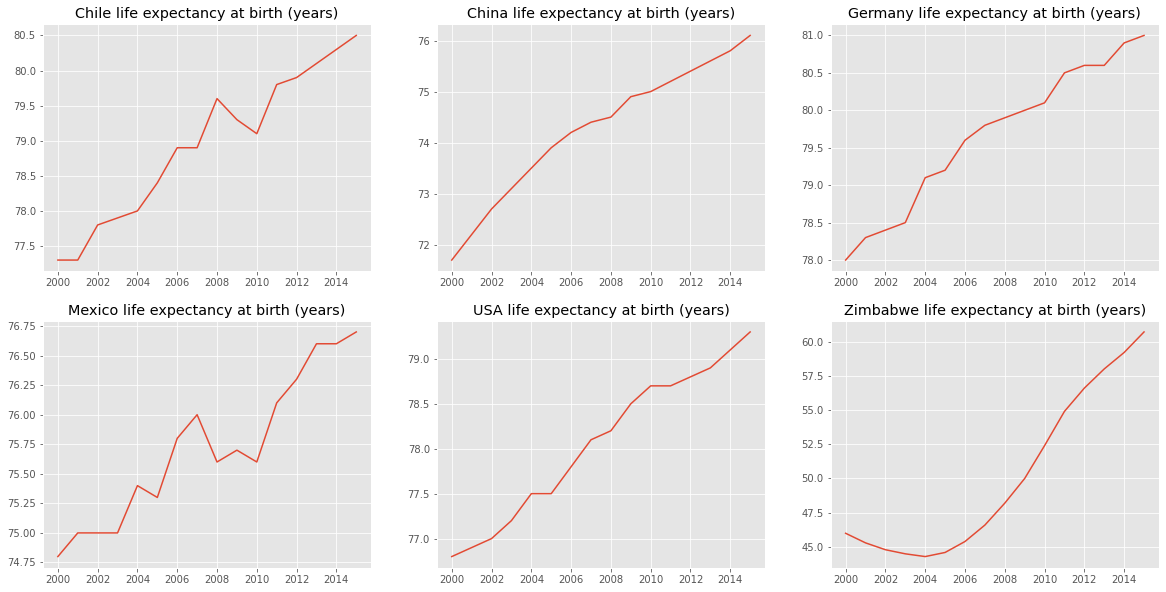

In [62]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.plot(chile.Year, chile['Life expectancy at birth (years)'])
plt.title('Chile life expectancy at birth (years)')
plt.subplot(2,3,2)
plt.plot(china.Year, china['Life expectancy at birth (years)'])
plt.title('China life expectancy at birth (years)')
plt.subplot(2,3,3)
plt.plot(germany.Year, germany['Life expectancy at birth (years)'])
plt.title('Germany life expectancy at birth (years)')
plt.subplot(2,3,4)
plt.plot(mexico.Year, mexico['Life expectancy at birth (years)'])
plt.title('Mexico life expectancy at birth (years)')
plt.subplot(2,3,5)
plt.plot(usa.Year, usa['Life expectancy at birth (years)'])
plt.title('USA life expectancy at birth (years)')
plt.subplot(2,3,6)
plt.plot(zimbabwe.Year, zimbabwe['Life expectancy at birth (years)'])
plt.title('Zimbabwe life expectancy at birth (years)')
plt.show()

# Linear Regression

In [68]:
usa_X = usa.Year.values.reshape(-1,1)
usa_ = usa['Life expectancy at birth (years)']

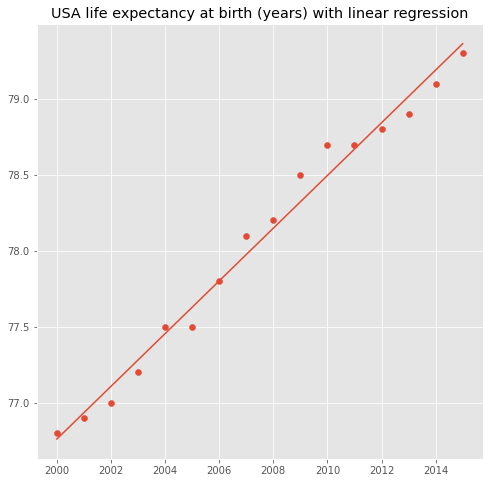

In [69]:
usa_regression = linear_model.LinearRegression()
usa_regression.fit(usa_X, usa_y)
usa_prediction = usa_regression.predict(usa_X)
plt.figure(figsize=(8,8))
plt.scatter(usa_X, usa_y)
plt.plot(usa_X, usa_prediction)
plt.title('USA life expectancy at birth (years) with linear regression')
plt.show()

Given this graph we could already roughly eyeball a line such as this based on how close these data points are to it. In this case a linear regression isn't super usefull for looking at the past, but what it is great for is predicting the future! What if we wanted to see the linear regression models prediction for 2030? We could do that!

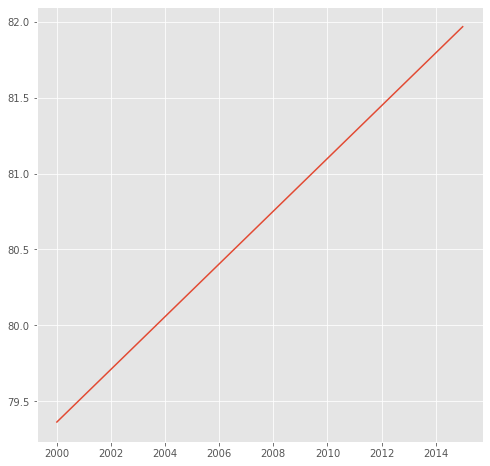

In [70]:
usa_future = np.arange(2015, 2031).reshape(-1,1)
usa_future_prediction = usa_regression.predict(usa_future)
plt.figure(figsize=(8,8))
plt.plot(usa_X, usa_future_prediction)
plt.show()